<a href="https://colab.research.google.com/github/SolisProcopioUriel/SimulacionII/blob/main/Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install simpy
import random
import simpy
import pandas as pd
import matplotlib.pyplot as plt

NUEVOS_CLIENTES = 15  # Número total de clientes
INTERVALO_CLIENTES = 10  # Generar nuevos clientes aproximadamente cada x segundos
PACIENCIA_MINIMA = 4  # Paciencia mínima del cliente
PACIENCIA_MAXIMA = 6  # Paciencia máxima del cliente

# Variables para almacenar los tiempos de llegada, tiempos de espera y tiempos de servicio de los clientes
tiempos_llegada = []
tiempos_espera = []
tiempos_servicio = []
abandonaron = 0
se_mantienen = 0

def fuente(env, numero, intervalo, contador):
    """Fuente genera clientes de forma aleatoria"""
    for i in range(numero):
        c = cliente(env, 'Cliente%1d' % (i+1), contador, tiempo_en_banco=12.0)
        env.process(c)
        t = random.expovariate(1.0 / intervalo)
        yield env.timeout(t)


def cliente(env, nombre, contador, tiempo_en_banco):
    """El cliente llega, es atendido y se va."""
    llegada = env.now
    tiempos_llegada.append(llegada)
    print('%7.4f %s: Aquí estoy' % (llegada, nombre))

    with contador.request() as req:
        paciencia = random.uniform(PACIENCIA_MINIMA, PACIENCIA_MAXIMA)
        resultados = yield req | env.timeout(paciencia)

        espera = env.now - llegada

        if req in resultados:
            print('%7.4f %s: Esperé %6.3f' % (env.now, nombre, espera))
            tiempos_espera.append(espera)
            global se_mantienen
            se_mantienen += 1

            tib = random.expovariate(1.0 / tiempo_en_banco)
            yield env.timeout(tib)
            print('%7.4f %s: Terminé' % (env.now, nombre))
            tib = env.now - llegada
            tiempos_servicio.append(tib)
        else:
            print('%7.4f %s: ABANDONÉ después de %6.3f' % (env.now, nombre, espera))
            tiempos_espera.append(espera)
            global abandonaron
            abandonaron += 1
            tib = [None]
            tiempos_servicio.append(tib)


# Configuración y ejecución de la simulación
env = simpy.Environment()

contador = simpy.Resource(env, capacity=1)
env.process(fuente(env, NUEVOS_CLIENTES, INTERVALO_CLIENTES, contador))
env.run()

# Crear la tabla de tiempos de llegada, tiempos de espera y tiempos de servicio
tabla = pd.DataFrame({
    'Número de Cliente': ['Cliente%01d' % (i+1) for i in range(NUEVOS_CLIENTES)],
    'Tiempo de Llegada': tiempos_llegada,
    'Tiempo de Espera': tiempos_espera + [None] * (NUEVOS_CLIENTES - len(tiempos_espera)),
    'Tiempo de Servicio': tiempos_servicio + [None] * (NUEVOS_CLIENTES - len(tiempos_servicio))
})
tabla1 = tabla.set_index('Número de Cliente')

 0.0000 Cliente1: Aquí estoy
 0.0000 Cliente1: Esperé  0.000
 2.3937 Cliente1: Terminé
 8.7847 Cliente2: Aquí estoy
 8.7847 Cliente2: Esperé  0.000
10.8872 Cliente2: Terminé
15.9225 Cliente3: Aquí estoy
15.9225 Cliente3: Esperé  0.000
18.1445 Cliente4: Aquí estoy
19.2865 Cliente3: Terminé
19.2865 Cliente4: Esperé  1.142
21.1306 Cliente4: Terminé
32.4477 Cliente5: Aquí estoy
32.4477 Cliente5: Esperé  0.000
32.5249 Cliente5: Terminé
85.0159 Cliente6: Aquí estoy
85.0159 Cliente6: Esperé  0.000
85.9813 Cliente7: Aquí estoy
86.5869 Cliente6: Terminé
86.5869 Cliente7: Esperé  0.606
89.1046 Cliente7: Terminé
92.6066 Cliente8: Aquí estoy
92.6066 Cliente8: Esperé  0.000
111.4805 Cliente9: Aquí estoy
116.7763 Cliente8: Terminé
116.7763 Cliente9: Esperé  5.296
125.3652 Cliente10: Aquí estoy
129.6149 Cliente10: ABANDONÉ después de  4.250
133.4795 Cliente11: Aquí estoy
134.9382 Cliente12: Aquí estoy
136.6015 Cliente13: Aquí estoy
138.9034 Cliente11: ABANDONÉ después de  5.424
140.4106 Cliente12: AB

In [25]:
# Mostrar la tabla
print('Tabla de Tiempos de Llegada, Tiempos de Espera y Tiempos de Servicio:\n')
print(tabla1)

Tabla de Tiempos de Llegada, Tiempos de Espera y Tiempos de Servicio:

                   Tiempo de Llegada  Tiempo de Espera Tiempo de Servicio
Número de Cliente                                                        
Cliente1                    0.000000          0.000000           2.393679
Cliente2                    8.784683          0.000000           2.102564
Cliente3                   15.922514          0.000000           3.364024
Cliente4                   18.144526          1.142013           2.986106
Cliente5                   32.447668          0.000000            0.07721
Cliente6                   85.015903          0.000000           1.570955
Cliente7                   85.981330          0.605527           3.123241
Cliente8                   92.606598          0.000000          24.169726
Cliente9                  111.480483          5.295841             [None]
Cliente10                 125.365176          4.249718             [None]
Cliente11                 133.479466     

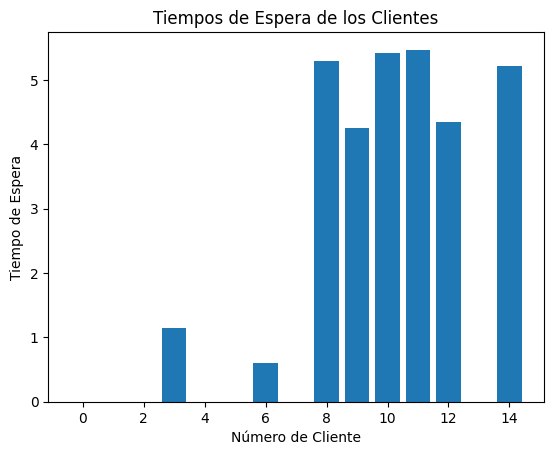

In [26]:
# Crear la gráfica de barras de los tiempos de espera
plt.bar(range(len(tiempos_espera)), tiempos_espera)
plt.xlabel('Número de Cliente')
plt.ylabel('Tiempo de Espera')
plt.title('Tiempos de Espera de los Clientes')
plt.show()

In [28]:
print("Personas que abandonaron:", abandonaron)
print("Personas que se quedaron:", se_mantienen)

Personas que abandonaron: 5
Personas que se quedaron: 10
